In [120]:
# Import all necessary libraries.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [121]:
# generate 2 class dataset
x, y = make_classification(n_samples=10000, n_classes=2, weights=[0.9,0.5],
random_state=42)

# Split data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)

## GaussianNB

In [122]:
# Instantiate a Gaussian Naive Bayes model.
clf = GaussianNB()

# Train the MultinomialNB model.
clf.fit(x_train, y_train)

# Prediction.
y_pred = clf.predict(x_test)

In [123]:
# Accuracy score.
accuracy_score(y_test, y_pred)

0.84975

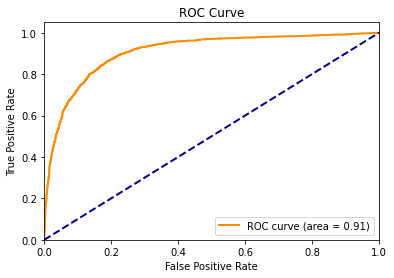

In [124]:
# Getting the probabilities for each class.
y_prob = clf.predict_proba(x_test)

# Compute ROC curve and ROC area for each class.
plt.figure()
lw = 2
# Calculating ROC curve and ROC AUC.
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc_gnb = roc_auc_score(y_test, y_prob[:,1])

plt.plot(fpr_gnb, tpr_gnb, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_gnb)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

In [125]:
# Instantiate Logistic classifier.
clf = LogisticRegression(solver='lbfgs')
# Train the model.
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
# Prediction.
y_pred = clf.predict(x_test)

# Accuracy score.
accuracy_score(y_test, y_pred)


0.8805

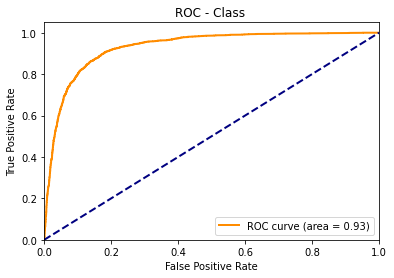

In [127]:
# Getting the probabilities for each class.
y_prob = clf.predict_proba(x_test)

# Compute ROC curve and ROC area for each class.
plt.figure()
lw = 2
# Calculating ROC curve and ROC AUC.
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc_lr = roc_auc_score(y_test, y_prob[:,1])

plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")
plt.show()

## K-NN

In [128]:
# Set parameters for grid-search.
param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 10, 15, 20]}]

# Instantiate k-NN class.
clf = KNeighborsClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=3, n_jobs=-1)

# Find best hyperparameters.
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 10, 15, 20],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [129]:
print('Optimal Hyperparameters:\n', grid_search.best_params_)
print('\nBest Score:\n', grid_search.best_score_)

Optimal Hyperparameters:
 {'n_neighbors': 20, 'weights': 'distance'}

Best Score:
 0.8700034367200784


In [130]:
# Create an instance of Neighbours Classifier and fit the data with best k, defining with GridSearchCV which is the best k = n_neighbors
knn = KNeighborsClassifier(n_neighbors=20, weights='distance')

# Train model for knn
knn.fit(x_train, y_train)

# Getting the probabilities for each class.
y_prob_knn = knn.predict_proba(x_test)

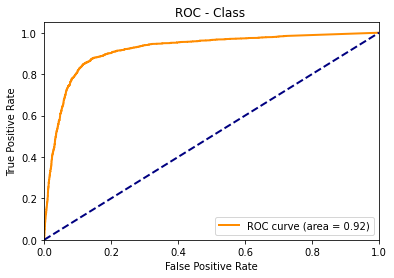

In [131]:
# Getting the probabilities for each class.
y_prob = grid_search.predict_proba(x_test)

# Compute ROC curve and ROC area for each class.
plt.figure()
lw = 2
# Calculating ROC curve and ROC AUC.
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc_knn = roc_auc_score(y_test, y_prob[:,1])

plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")
plt.show()

## Gaussian vs Logistic vs Knn

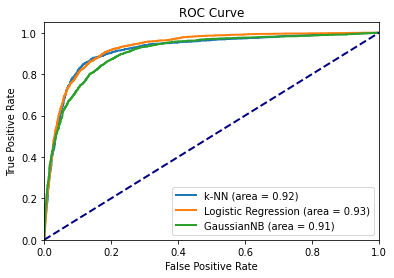

In [132]:
# Compute ROC curve and ROC area for each class.
#plt.figure(figsize=(5, 5))

# Compute ROC curve
plt.figure()
lw = 2

plt.plot(fpr_knn, tpr_knn, lw=lw, label='k-NN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_lr, tpr_lr, lw=lw, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_gnb, tpr_gnb, lw=lw, label='GaussianNB (area = %0.2f)' % roc_auc_gnb)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**Analisando as curvas ROC e os valores das áreas sob as curvas, qual classificador apresenta a melhor performance?**

R: Analisando as Curvas ROC e os Valores das áreas sob as curvas , podemos afirmar que o classifidor Logistic Regression apresenta melhor Performance. 